<a href="https://colab.research.google.com/github/Danamorah/Prueba-JS/blob/master/Laboratorio_5_Redes_Convolucionales_IA_vAlumnos(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomado IA: Aprendizaje Profundo I - Parte 1**. <br> Práctico Clase 5: Redes Convolucionales
---
---

**Profesores:**
- Alain Raymond
- Miguel Fadic
- Gabriel Sepúlveda
- Álvaro Soto

**Ayudante:**
- Andres Villa
---
---

El siguiente práctico se debe realizar de forma individual. El formato de entregar es el **archivo .ipynb con todas las celdas ejecutadas**. Las secciones donde se planteen preguntas de forma explícita, deben ser respondida en celdas de texto, y no se aceptará solo el _output_ de una celda de código como respuesta.

**Nombre alumno:** Daniela Mora Herrera

El siguiente práctico contendrá 1 o más actividades a realizar. Algunas actividades corresponderán a escribir código y otras a responder preguntas.

Antes de responder, se recomienda **fuertemente** revisar las secciones previas donde se desarrollan los ejemplos, dado que algunas de las actividades pueden ser completadas reutilizando el mismo código.

**Fecha de entrega:** viernes 02 de junio de 2023, 23:59 hrs.

---
**IMPORTANTE:** habrá un bonus de 1 décima para todos aquellos alumnos/as que muestren buen orden en sus respuestas (esto aplica a legibilidad de código, buena redacción, formalidad, organización del jupyter notebook, seguimiento de instrucciones, etc). El criterio lo pondrá cada ayudante corrector. La nota máxima obtenible en el laboratorio es 7.0

## Introducción a Google Colab

Google Colab es una herramienta gratuita (para cualquier persona con una cuenta Gmail), para poder programar de forma interactiva en Python.

Ventajas:
* Podemos programar de forma interactiva viendo los resultados de nuestro código paso a paso.
* No requiere que tengamos nada instalado en nuestro computador excepto un browser compatible como Google Chrome, Mozilla Firefox o Microsoft Edge.
* Podemos experimentar en un ambiente seguro con cantidad razonable de recursos y sin ninguna posibilidad de arruinar nuestros computadores.
* Tenemos acceso a GPUs (¡gratis!) para nuestros cálculos.

Si quieres ahondar más en profundidad en Colab, te recomendamos el siguiente tutorial: https://www.tutorialspoint.com/google_colab/google_colab_tutorial.pdf.


¡Probemos algunas cosas rápidas!

In [ ]:
5 + 3

8

In [ ]:
a = 0

In [ ]:
a  = a + 3

In [ ]:
a

3

A diferencia de cuando programamos normalmente, en Colab cada comando ejecutado depende de todos los otros comandos que hayamos ejecutado. Esta ejecución no tiene por qué ser secuencial.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Activar la GPU
Eventualmente querremos entrenar un modelo profundo, por lo que necesitaremos una GPU para entrenarlo. Colab nos provee una. Sin embargo, debemos activar el uso de la GPU en el ambiente Colab.

Debemos ir al menú superior, elegir "Runtime" --> "Change Runtime Type". En el dropdown de "Hardware Accelerator" cambiaremos la opción a "GPU". Esto basta hacerlo una sola vez por cada notebook que tengamos, esta opción queda guardada entre sesiones.

### Subir archivos

A la izquierda de la ventana podrán ver un ícono de una carpeta. Si hacen click en él, podrán visualizar la interfaz de archivos de Colab. Esta les muestra que archivos hay actualmente en su espacio de trabajo y les permite subir archivos desde su computador, o incluso conectarse con su cuenta de Google Drive para tener acceso a sus archivos. Para subir archivos sólo deben hacer click en el botón que muestra un archivo con una flecha hacia arriba. Para conectar con su cuenta de Google Drive sólo deben hacer click en el botón de más a la derecha con el símbolo de Drive. Sus archivos de Drive quedan accesibles en la carpeta 'drive'.


### Instalar Librerías

Colab trabaja sobre un ambiente Linux, por lo que ustedes pueden también ejecutar comandos de Linux en caso de ser necesario. Para ello sólo deben anteponer el comando con un '!'.

**Ejemplos:**
Por ejemplo, el siguiente comando instala la librería *transformers* de Python.

In [ ]:
!pip install transformers

Crear un archivo con *touch*:

In [ ]:
!touch test.txt

Copiar un archivo:

In [ ]:
!cp test.txt test1.txt

Eliminar archivos:

In [ ]:
!rm *.txt

Un comentario final: hay ciertos comandos que no van a poder ejecutar pues están deshabilitados, pero para todos los fines prácticos, no deberían tener muchas restricciones.

## Parte 1: Creando AlexNet

En la siguiente sección vamos a ver cómo traducimos todas esas piezas que vimos en la clase de Redes Convolucionales (filtros, *stride*, *padding*, etc.) en código práctico en Python.

Recordemos la estructura de AlexNet:


![alt text](https://www.researchgate.net/profile/Sherif_Shehata2/publication/308880040/figure/fig3/AS:413548556636165@1475609067864/An-illustration-of-the-architecture-of-AlexNet-deep-convolutional-neural-network.png)

Algunos comentarios:

* Si no se menciona el stride en la capa, se asume que es de 1.
* Sólo hay Max Pooling en las capas que se indica. Si hay usa *stride* de 2 y kernel de (3,3).
* El *padding* por capa es:



>Capa | Padding
>--- | ---
>Conv1 | 2
>Conv2 | 2
>Conv3 | 1
>Conv4 | 1
>Conv5 | 1

¡Empecemos a armarlo!

In [ ]:
import torch
import torch.nn as nn           # Esto es PyTorch y su módulo de Redes Neuronales

class AlexNet(nn.Module):                   # Esta clase representa nuestro modelo

    def __init__(self):   # Constructor, aquí armamos las piezas de nuestra red
        super(AlexNet, self).__init__()
        # Bloques Convolucionales
        # Recordemos que los Bloques Convolucionales van a estar hechos de 3
        # elementos: Convolución, Pooling y Activación.
        # En este caso usaremos Convoluciones 2d, Max Pooling y ReLU

        # Input = 3x 224 x 224 Output = 96 x 55 x 55 --> Max Pool = 96 x 27 x 27
        self.conv1 = nn.Sequential(
            nn.Conv2d(                           # Todo esto define a la Convolución
                      in_channels=3,             # Filtros/Canales de Entrada (RGB)
                      out_channels=96,           # Filtros/Canales de Salida
                      kernel_size=(11,11),       # Tamaño de la Convolución
                      stride=(4,4),              # Stride
                      padding=(2,2)),                # Cuántos pixeles de padding
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)), # Max Pooling
            nn.ReLU()                            # Activación
        )

        # Input = 96 x 27 x 27 Output = 256 x 27 x 27 --> Max Pool = 256 x 13 x 13
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                      in_channels=96,
                      out_channels=256,
                      kernel_size=(5,5),
                      stride=(1,1),
                      padding=(2,2)),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
            nn.ReLU()
        )
        # Input = 256 x 13 x 13 Output = 384 x 13 x 13
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                      in_channels=256,
                      out_channels=384,
                      kernel_size=(3,3),
                      stride=(1,1),
                      padding=(1,1)),
            nn.ReLU()
        )
        # Input = 384 x 13 x 13 Output = 384 x 13 x 13
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                      in_channels=384,
                      out_channels=384,
                      kernel_size=(3,3),
                      stride=(1,1),
                      padding=(1,1)),
            nn.ReLU()
        )
        # Input = 384 x 13 x 13 Output = 256 x 13 x 13 --> MaxPool = 256 x 6 x 6
        self.conv5 = nn.Sequential(
            nn.Conv2d(
                      in_channels=384,
                      out_channels=256,
                      kernel_size=(3,3),
                      stride=(1,1),
                      padding=(1,1)),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
            nn.ReLU()
        )
        # Input = 256 x 6 x 6 Output = 128 x 6 x 6 --> MaxPool = 128 x 2 x 2
        self.conv6 = nn.Sequential(
            nn.Conv2d(
                      in_channels=256,
                      out_channels=128,
                      kernel_size=(3,3),
                      stride=(1,1),
                      padding=(1,1)),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
            nn.ReLU()
        )
        ##
        self.flat = nn.Flatten()    # Capa aplanamiento para poder vincular
                                    # resultado convolucional con capas
                                    # lineales.
        # Bloques Fully Connected/MLP
        # Input = 128 x 2 x 2 = 512 Output = 1024
        self.fc6 = nn.Sequential(
                                  nn.Linear(512, 1024),
                                  nn.ReLU()
                                  )
        # Input = 1024 Output = 1024
        self.fc7 = nn.Sequential(
                                  nn.Linear(1024, 1024),
                                  nn.ReLU()
                                  )
        # Input = 1024 Output = 1000
        self.fc8 = nn.Sequential(
                                  nn.Linear(1024, 1000)
                                  )

    def forward(self, x):        # Aquí armamos cómo se conectan las piezas
                                 # Esta red es sencilla pues solo tenemos
                                 # que conectar las piezas una detrás de la
                                 # otra. No todas las redes son así.
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.flat(x)
        x = self.fc6(x)
        x = self.fc7(x)
        x = self.fc8(x)

        return x



### ¿Cómo saber cuál va a ser la dimensionalidad de la salida de una capa convolucional?

Esto suele ser un problema a la hora de armar una red convolucional, porque en algún momento (en particular al pasar a la sección fully connected de nuestra red) vamos a necesitar saber cuántas neuronas tiene nuestra red en un cierto punto. Por suerte, ¡existe una fórmula sencilla para calcularlo!

* Sean $H, W$ el alto y ancho de nuestra imagen o de nuestros features convolucionales.
* Sean $K_H, K_W$ los tamaños de los kernels asociados a $H$ y $W$.
* Sean $S_H, S_W$ el *stride* asociado a $H$ y $W$.
* Sea $P$ la cantidad de pixeles de padding.

Entonces la dimensión de las caraterísticas de salida sería:

$$O_H = \lfloor\frac{H - K_H + 2P}{S_H}\rfloor + 1$$

$$O_W =  \lfloor\frac{W - K_W + 2P}{S_W}\rfloor + 1$$

Por ejemplo para la primera capa de AlexNet tendríamos:

$$O_H = \lfloor \frac{224 - 11 + 2\cdot2}{4}\rfloor + 1 = 55 $$
$$O_W = \lfloor\frac{224 - 11 + 2\cdot2}{4}\rfloor + 1 = 55 $$

¡Que es justo lo que esperábamos!


In [ ]:
#@title Calculadora de Dimensionalidad de Salida { run: "auto" }
from math import floor   # Para redondear hacia abajo
H =  13#@param {type:"integer"}
W =  13#@param {type:"integer"}
K =  3#@param {type:"integer"}
S =   2#@param {type:"integer"}
P =   1#@param {type:"integer"}

output_H = floor((H - K + 2*P)/S) + 1
output_W = floor((H - K + 2*P)/S) + 1

print("Nuestro dimensionalidad de output es: ({}, {}).".format(output_H, output_W))

Nuestro dimensionalidad de output es: (7, 7).


### ¿Cómo calculamos la cantidad de neuronas a la salida de una capa convolucional?

La cantidad de neuronas es de:

$$ C_{out} \cdot H \cdot W  $$


In [ ]:
6*6*256

9216

In [ ]:
#@title Calculadora de Neuronas { run: "auto" }
C_out = 256 #@param {type:"integer"}
H = 6 #@param {type:"integer"}
W =  6#@param {type:"integer"}

neuronas = C_out*H*W

print("La cantidad de neuronas es de: {}.".format(neuronas))

La cantidad de neuronas es de: 9216.


### ¿Cómo calculamos la cantidad de parámetros asociados a una capa convolucional?

* Sean $C_{in}$, $C_{out}$ los canales de entrada y salida de la capa.
* Sea $K_H$, $K_W$ los tamaños del kernel de la capa.
* $B$ es igual a $C_{out}$ en caso de usar *bias* en nuestra capa (lo más usual) y 0 en caso contrario.

Entonces, la cantidad de parámetros es de:

$$ C_{in} \cdot C_{out} \cdot K_H \cdot K_W + B  $$


In [ ]:
#@title Calculadora de Cantidad de Parámetros { run: "auto" }
# Aqui definimos características de una capa para calcular su número de parámetros
C_in =  3#@param {type:"integer"}
C_out = 96 #@param {type:"integer"}
K_H = 11 #@param {type:"integer"}
K_W = 11 #@param {type:"integer"}
use_bias = True #@param ["False", "True"] {type:"raw"}

if use_bias:
    bias = C_out
else:
    bias = 0

params = C_in*C_out*K_H*K_W + bias

print("La cantidad de parámetros es: {}.".format(params))

La cantidad de parámetros es: 34944.


In [ ]:
def contar_parametros(modelo):
    contador = 0
    for nombre, modulo in modelo.named_children():
        params = sum(p.numel() for p in modulo.parameters() if p.requires_grad)
        print("Cantidad Parámetros Capa '{}': {}.".format(nombre, params))
        contador += params

    print("La cantidad total de parámetros es: {}.".format(contador))
    return contador

In [ ]:
alex = AlexNet()
contar_parametros(alex)

Cantidad Parámetros Capa 'conv1': 34944.
Cantidad Parámetros Capa 'conv2': 614656.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'conv6': 295040.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 525312.
Cantidad Parámetros Capa 'fc7': 1049600.
Cantidad Parámetros Capa 'fc8': 1025000.
La cantidad total de parámetros es: 6642152.


6642152

### Probando la Red

Para verificar que la red funciona vamos a crear imágenes aleatorias y probaremos que se propaguen correctamente por la red. Si lanza un error, quiere decir que alguna de las capas que definimos no están entregando las dimensiones que esperábamos.

In [ ]:
alex = AlexNet() # Creamos una instancia de nuestra red
datos_random = torch.randn((10, 3, 224, 224)).float() # Creamos un batch de 10 imágenes aleatorias
resultado = alex(datos_random) # Metemos como input las imágenes a la red
print("El resultado tiene forma: ({}, {})".format(resultado.shape[0],resultado.shape[1]))

El resultado tiene forma: (10, 1000)


## Actividades

Si bien fácilmente podemos reutilizar AlexNet para trabajar con imágenes de tamaño distinto a 224x224 cambiando el tamaño de las imágenes, esto es muy costoso pues estamos entrenando más parámetros de los que necesitamos en caso de entrenar con imágenes más pequeñas. Por lo tanto, le vamos a pedir que:

1. Altere el modelo original para que trabaje en clasificación de 102 clases y no 1000. Llame a la clase de su modelo MiAlexNet.

2. Altere la definición de MiAlexNet anterior para que tome como input imágenes de 3 x 64 x 64. Para esto, deberá alterar las capas *conv1* y *conv2* manteniendo el resto iguales. Llame a la clase de su modelo MiAlexNet. ¿Cómo cambia la cantidad de parámetros?

3. Ahora usando el modelo original (o sea, sin incluir los cambios de la actividad 1 y 2) agregue una capa convolucional después de *conv5* de nombre *conv6* que reduzca la cantidad de filtros a 128. Altere *fc6* para hacer que esto funcione. Además, altere las capas lineales para que trabajen con 1024 dimensiones en vez de 4096. Recuerde que no sólo tiene que agrear la capa convolucional extra sino que hacer el cambio en la función *forward* para que ocupe *conv6*. Llame a la clase de su modelo MiAlexNet. ¿Cómo cambia la cantidad de parámetros?



Una vez cree su clase MiAlexNet, ocupe el siguiente código para hacer el conteo de parámetros.

# Respuestas:


*   2 - La diferencia de parametros disminuyo de 4.099.970 a 3.991.970. La cantidad de parametros disminuye
*   3 - La cantidad de parametros disminuyo de 62.378.344 a 6.642.152






In [ ]:
modelo = MiAlexNet()
modelo_antiguo = AlexNet()
diferencia = contar_parametros(modelo_antiguo) - contar_parametros(modelo)
print("La diferencia es de {} de parámetros.".format(diferencia))

aki Sequential(
  (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
)
Cantidad Parámetros Capa 'conv1': 34944.
Cantidad Parámetros Capa 'conv2': 614656.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 37752832.
Cantidad Parámetros Capa 'fc7': 16781312.
Cantidad Parámetros Capa 'fc8': 4097000.
La cantidad total de parámetros es: 62378344.
Cantidad Parámetros Capa 'conv1': 115296.
Cantidad Parámetros Capa 'conv2': 221440.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 37752832.
Cantidad Parámetros Capa 'fc7': 16781312.
Cantidad Parámetros Capa 'fc8': 417894.
La cantidad to

## Solución

### Actividad 1

In [ ]:
import torch
import torch.nn as nn           # Esto es PyTorch y su módulo de Redes Neuronales

class MiAlexNet(nn.Module):               # Esta clase representa nuestro modelo

    def __init__(self):   # Constructor, aquí armamos las piezas de nuestra red
        super(MiAlexNet, self).__init__()
        # Bloques Convolucionales
        # Recordemos que los Bloques Convolucionales van a estar hechos de 3
        # elementos: Convolución, Pooling y Activación.
        # En este caso usaremos Convoluciones 2d, Max Pooling y ReLU

        # Input = 3x 64 x 64 Output = 96 x 55 x 55 --> Max Pool = 96 x 27 x 27
        self.conv1 = nn.Sequential(
            nn.Conv2d(                           # Todo esto define a la Convolución
                      in_channels=3,             # Filtros/Canales de Entrada (RGB)
                      out_channels=96,           # Filtros/Canales de Salida
                      kernel_size=(20,20),       # Tamaño de la Convolución
                      stride=(1,1),              # Stride
                      padding=(5,5)),                # Cuántos pixeles de padding
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)), # Max Pooling
            nn.ReLU(),                            # Activación
        )

        # Input = 96 x 27 x 27 Output = 256 x 27 x 27 --> Max Pool = 256 x 13 x 13
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                      in_channels=96,
                      out_channels=256,
                      kernel_size=(3,3),
                      stride=(1,1),
                      padding=(1,1)),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
            nn.ReLU()
        )
        # Input = 256 x 13 x 13 Output = 384 x 13 x 13
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                      in_channels=256,
                      out_channels=384,
                      kernel_size=(3,3),
                      stride=(1,1),
                      padding=(1,1)),
            nn.ReLU()
        )
        # Input = 384 x 13 x 13 Output = 384 x 13 x 13
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                      in_channels=384,
                      out_channels=384,
                      kernel_size=(3,3),
                      stride=(1,1),
                      padding=(1,1)),
            nn.ReLU()
        )
        # Input = 384 x 13 x 13 Output = 256 x 13 x 13 --> MaxPool = 256 x 6 x 6
        self.conv5 = nn.Sequential(
            nn.Conv2d(
                      in_channels=384,
                      out_channels=256,
                      kernel_size=(3,3),
                      stride=(1,1),
                      padding=(1,1)),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
            nn.ReLU()
        )
        ##
        self.flat = nn.Flatten()    # Capa aplanamiento para poder vincular
                                    # resultado convolucional con capas
                                    # lineales.
        # Bloques Fully Connected/MLP
        # Input = 256 x 6 x 6 = 9216 Output = 4096
        self.fc6 = nn.Sequential(
                                  nn.Linear(9216, 4096),
                                  nn.ReLU()
                                  )
        # Input = 4096 Output = 4096
        self.fc7 = nn.Sequential(
                                  nn.Linear(4096, 4096),
                                  nn.ReLU()
                                  )
        # Input = 4096 Output = 1000
        self.fc8 = nn.Sequential(
                                  nn.Linear(4096, 102)
                                  )

    def forward(self, x):        # Aquí armamos cómo se conectan las piezas
                                 # Esta red es sencilla pues solo tenemos
                                 # que conectar las piezas una detrás de la
                                 # otra. No todas las redes son así.
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.flat(x)
        x = self.fc6(x)
        x = self.fc7(x)
        x = self.fc8(x)

        return x

In [ ]:
modelo = MiAlexNet()
modelo_antiguo = AlexNet()
diferencia = contar_parametros(modelo_antiguo) - contar_parametros(modelo)
print("La diferencia es de {} de parámetros.".format(diferencia))

aki Sequential(
  (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
)
Cantidad Parámetros Capa 'conv1': 34944.
Cantidad Parámetros Capa 'conv2': 614656.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 37752832.
Cantidad Parámetros Capa 'fc7': 16781312.
Cantidad Parámetros Capa 'fc8': 4097000.
La cantidad total de parámetros es: 62378344.
Cantidad Parámetros Capa 'conv1': 115296.
Cantidad Parámetros Capa 'conv2': 221440.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 37752832.
Cantidad Parámetros Capa 'fc7': 16781312.
Cantidad Parámetros Capa 'fc8': 417894.
La cantidad to

Probando mi alexNet

In [ ]:
miAlex = MiAlexNet() # Creamos una instancia de nuestra red
datos_random = torch.randn((10, 3, 64, 64)).float() # Creamos un batch de 10 imágenes aleatorias
resultado = miAlex(datos_random) # Metemos como input las imágenes a la red
print("El resultado tiene forma: ({}, {})".format(resultado.shape[0],resultado.shape[1]))

El resultado tiene forma: (10, 102)


In [ ]:
contar_parametros(miAlex)

Cantidad Parámetros Capa 'conv1': 115296.
Cantidad Parámetros Capa 'conv2': 221440.
Cantidad Parámetros Capa 'conv3': 885120.
Cantidad Parámetros Capa 'conv4': 1327488.
Cantidad Parámetros Capa 'conv5': 884992.
Cantidad Parámetros Capa 'flat': 0.
Cantidad Parámetros Capa 'fc6': 37752832.
Cantidad Parámetros Capa 'fc7': 16781312.
Cantidad Parámetros Capa 'fc8': 417894.
La cantidad total de parámetros es: 58386374.


58386374

## Parte 2 - Aplicaciones

### 1. Imágenes - ¡Creemos un clasificador de distintos tipos de flores!

En esta parte, vamos a trabajar con un conjunto de datos de 102 tipos de flores, el dataset Flowers (http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html)), que nos ofrece 8.189 fotos distintas y es un conjunto de datos no tradicional. ¡Veamos cómo nos va!

Todo lo necesario para trabajar de ahora en adelante lo pueden bajar a su sesión de Colab con el siguiente comando:

In [ ]:
!wget https://www.dropbox.com/s/kda4klivyttdb71/lab1_CNN_IA.zip -q --show-progress
!unzip lab1_CNN_IA.zip
!tar -xzf flowers.tar.gz

lab1_CNN_IA.zip     100%[===================>] 536.46M  57.0MB/s    in 9.8s    
Archive:  lab1_CNN_IA.zip
  inflating: test_model.py           
  inflating: flowers.py              
  inflating: flowers.tar.gz          
  inflating: alexnet.pth             


Con eso, ya tenemos el dataset descomprimido en nuestro espacio de trabajo. Además, agregamos algunos archivos con código para lo que vamos a hacer más adelante (todavía no es necesario que entiendan el código, pero si te interesa, puedes inspeccionarlos).

Veamos algunos ejemplos del dataset:

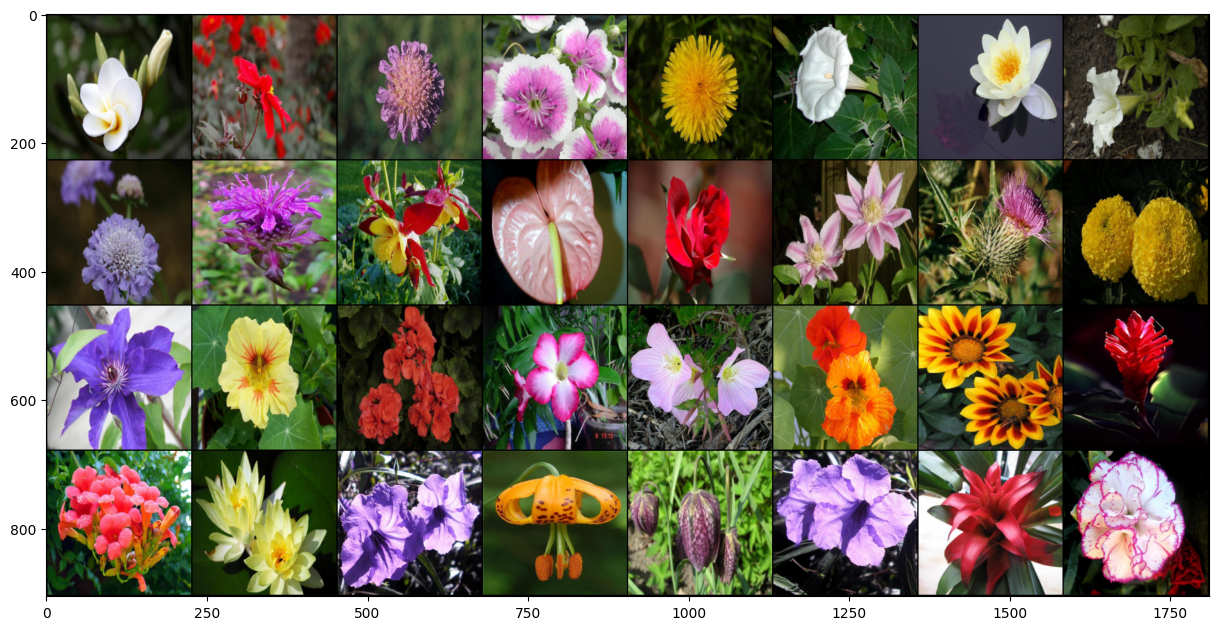

In [ ]:
import torch
from flowers import Flowers
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor, Resize, Compose
import matplotlib.pyplot as plt

## TODO ESTO LO ENTENDEREMOS EN EL LABORATORIO 2!
transforms = Compose([Resize((224, 224)), ToTensor()])
train_ds = Flowers("flowers_dataset/train", transform=transforms)
train_dl = DataLoader(train_ds, batch_size = 32, shuffle=True)
test_ds = Flowers("flowers_dataset/test", transform=transforms)
test_dl = DataLoader(test_ds, batch_size = 1024)

batch, _ = next(iter(train_dl))

plt.figure(figsize=(15,30))
foto = make_grid(batch, nrow=8).permute(1,2,0)

r = plt.imshow(foto)

Vamos a ocupar la red MiAlexNet que definimos en la actividad 1 para enfrentar este problema. Dado que esto puede tomar un buen tiempo, nosotros ya entrenamos sus pesos. El cómo lo hicimos, lo veremos en detalle en el laboratorio de la próxima semana.

#### A. Probemos el modelo sin entrenar

In [ ]:
modelo = MiAlexNet().cuda()             # Creamos Modelo, lo enviamos a GPU


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

Vamos a pasar todas las imágenes de test del dataset por nuestro modelo entrenado y vamos a calcular el accuracy del modelo. Esto es la cantidad de respuestas correctas sobre el total de imágenes probadas.

In [ ]:
from test_model import test_model
test_model(modelo, test_dl)

Correctas: 19.0 Total: 1738.0 Accuracy: 1.09%

Anda mal, ¿verdad? Alrededor del 1% de exactitud en una tarea con 102 clases es básicamente apuntarle al azar. Probemos ahora con un modelo preentrenado.

#### B. Carguemos los pesos preentrenados en nuestro modelo

In [ ]:
pesos = torch.load("alexnet.pth")       # Carga los pesos a una variable
modelo.load_state_dict(pesos)           # Carga los pesos al modelo

<All keys matched successfully>

#### C. Evaluemos el modelo entrenado

Vamos a pasar todas las imágenes de test del dataset por nuestro modelo entrenado y vamos a calcular el ***accuracy*** del modelo. Esto es la cantidad de respuestas correctas sobre el total de imágenes probadas.

In [ ]:
test_model(modelo, test_dl)

Correctas: 700.0 Total: 1738.0 Accuracy: 40.28%

¡El modelo obtiene alrededor de un 40% de accuracy en el set de test! ¡Bastante mejor que adivinar al azar!